### To analyze the performance of each sales team and individual team members

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [83]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Note: this requires running "./revenue_analysis.ipynb" first
Read in the csv output of revenue_analysis.ipynb

In [5]:
performance = pd.read_csv("./data/performance.csv", dtype=object)

In [11]:
performance.sort_values("payment", ascending=False).head()

,district,serviceunitname,account_no,name,address,customertype,bill_type,billedamount,outstandingamount,billyear,transformer,payment,marketer,team_leader
13424,ETETE,ETETE,4422787169,FELIX NOSA OKORO,0.DARLITON STREET,NON-MD,D,9743.8,9679.1375,2023,UGIOKHUEN 1,9970.0,Udoh Bright,ADESUWA MACKENZIE
2349,ETETE,ETETE,921447,OGUNMWONYI MRS B.A,24 24A UWADIA STREET,NON-MD,D,37567.036,217367.0255,2023,MABEL EREWA,9950.0,Helen Omoregie,OMORODION NELSON
12844,ETETE,UGBOR,960588,OVENSERI OMOREGIE,1 OMOREGIE STREET Off 1st powerline,NON-MD,D,12315.6085,52058.468,2023,OKABERE,9900.0,Efosa Onaiwu Allen,ESTHER EZE
4339,ETETE,ETETE,902072,Mary Mrs Oshodi,2 Wisdom street Off Eriaria road,NON-MD,D,25860.56281,281478.7059,2023,IYERE,9900.0,Osarodion Aisagbonbuomwan,JOSEPHINE ITOPA
16707,ETETE,UGBOR,15012,MR AMAZIN OSAKUE,2ND OSAIGBOVO STR BENIN/EDO,NON-MD,STORED_AVG,22200.21334,174473.6164,2023,OKABERE,9900.0,Efosa Onaiwu Allen,ESTHER EZE


In [16]:
performance.dtypes

district             object
serviceunitname      object
account_no           object
name                 object
address              object
customertype         object
bill_type            object
billedamount         object
outstandingamount    object
billyear             object
transformer          object
payment              object
marketer             object
team_leader          object
dtype: object

### Drop "billyear" column as the information is redundant

In [61]:
performance.drop(columns=["billyear"]).head()

,district,serviceunitname,account_no,name,address,customertype,bill_type,billedamount,outstandingamount,transformer,payment,marketer,team_leader
0,ETETE,UGBOR,30607,MR ERIC IYARE,UGBOR CENTRAL RD B/C B/C,NON-MD,SUSPENDED,0.000,1.847922e+05,UGBOR 2,0.0,Egbodo Judith,JUDITH MOMOH
1,ETETE,UGBOR,789124,SULEMAN AMINU . .,0 BEHIND OBE HEALTH CENTER ETETE,NON-MD,SUSPENDED,0.000,2.823000e+02,OBE 2,0.0,Martins Chiwetalu,NURUDEEN UMORU
2,ETETE,UGBOR,14978,LOVETH OBASOYEN,1 WHITE HOUSE KA78/415,NON-MD,D,13644.631,1.137383e+06,OKABERE,0.0,Efosa Onaiwu Allen,ESTHER EZE
3,ETETE,UGBOR,14891,A JERRY OSARETIN,"8, ONAGBORIA ABUMERE BENIN EDO",NON-MD,D,13644.631,6.338495e+05,OBE,0.0,Amaizu Clement,ESTHER EZE
4,ETETE,UGBOR,54660,FELIX AIGHOBAHI MR,8 CHIKE ORANYE STR.OFF OR BENIN,NON-MD,SUSPENDED,0.000,7.569893e+04,OSAGHAE,0.0,Azeez Ozoya,NELSON OHENHEN


### Convert "account_no", "billedamount", "outstandingamount", "payment" columns to numerical values

In [62]:
performance["account_no"] = performance["account_no"].apply(pd.to_numeric, errors="coerce").fillna(0)
performance["billedamount"] = performance["billedamount"].apply(pd.to_numeric, errors="coerce").fillna(0)
performance["outstandingamount"] = performance["outstandingamount"].apply(pd.to_numeric, errors="coerce").fillna(0)
performance["payment"] = performance["payment"].apply(pd.to_numeric, errors="coerce").fillna(0)

In [63]:
performance.dtypes

district              object
serviceunitname       object
account_no             int64
name                  object
address               object
customertype          object
bill_type             object
billedamount         float64
outstandingamount    float64
billyear              object
transformer           object
payment              float64
marketer              object
team_leader           object
dtype: object

## Analyze revenue performance by team

Order by highest to lowest customer count

In [66]:
perf_by_team = performance.groupby("team_leader").agg({"customertype": "count", "billedamount": "sum", "payment" : "sum"})

perf_by_team = perf_by_team.reset_index().sort_values("customertype", ascending=False)

perf_by_team.head()

,team_leader,customertype,billedamount,payment
11,JUDITH MOMOH,3518,3.502488e+07,14931118.93
7,ESTHER EZE,3396,2.763854e+07,16694930.30
2,ADESUWA MACKENZIE,2793,3.702305e+07,15157016.29
17,OMORODION NELSON,2428,4.699369e+07,17170046.94
13,NELSON OHENHEN,1864,3.748551e+07,13355536.47


### Rename colums for clarity

In [90]:
perf_by_team = perf_by_team.rename(columns={"customertype" : "customer_count", "billedamount" : "total_billed", "payment" : "total_revenue"} )
perf_by_team

,team_leader,customer_count,total_billed,total_revenue,percentage
11,JUDITH MOMOH,3518,3.502488e+07,14931118.93,42.630042
7,ESTHER EZE,3396,2.763854e+07,16694930.30,60.404535
2,ADESUWA MACKENZIE,2793,3.702305e+07,15157016.29,40.939409
17,OMORODION NELSON,2428,4.699369e+07,17170046.94,36.536920
13,NELSON OHENHEN,1864,3.748551e+07,13355536.47,35.628534
10,JOSEPHINE ITOPA,1768,2.487836e+07,8242920.00,33.132893
14,NURUDEEN UMORU,1010,5.831633e+06,1789408.02,30.684510
0,(MD IBIKUNLE AKINGBEMILA),315,1.170315e+07,8711662.31,74.438634
15,OJO IDEHEN,190,2.404706e+06,639700.00,26.602005
18,OSAHON EKHATOR,129,2.509703e+06,836601.00,33.334661


### Find percentage performance of the sales teams

Drop row for Customers not assigned to any Sales Team

In [ ]:
perf_by_team = perf_by_team.drop([1])

In [92]:
perf_by_team["percentage"] = (perf_by_team["total_revenue"] / perf_by_team["total_billed"]) * 100
perf_by_team

,team_leader,customer_count,total_billed,total_revenue,percentage
11,JUDITH MOMOH,3518,3.502488e+07,14931118.93,42.630042
7,ESTHER EZE,3396,2.763854e+07,16694930.30,60.404535
2,ADESUWA MACKENZIE,2793,3.702305e+07,15157016.29,40.939409
17,OMORODION NELSON,2428,4.699369e+07,17170046.94,36.536920
13,NELSON OHENHEN,1864,3.748551e+07,13355536.47,35.628534
10,JOSEPHINE ITOPA,1768,2.487836e+07,8242920.00,33.132893
14,NURUDEEN UMORU,1010,5.831633e+06,1789408.02,30.684510
0,(MD IBIKUNLE AKINGBEMILA),315,1.170315e+07,8711662.31,74.438634
15,OJO IDEHEN,190,2.404706e+06,639700.00,26.602005
18,OSAHON EKHATOR,129,2.509703e+06,836601.00,33.334661


Visualize the share of total customer population in the district as assigned to different teams

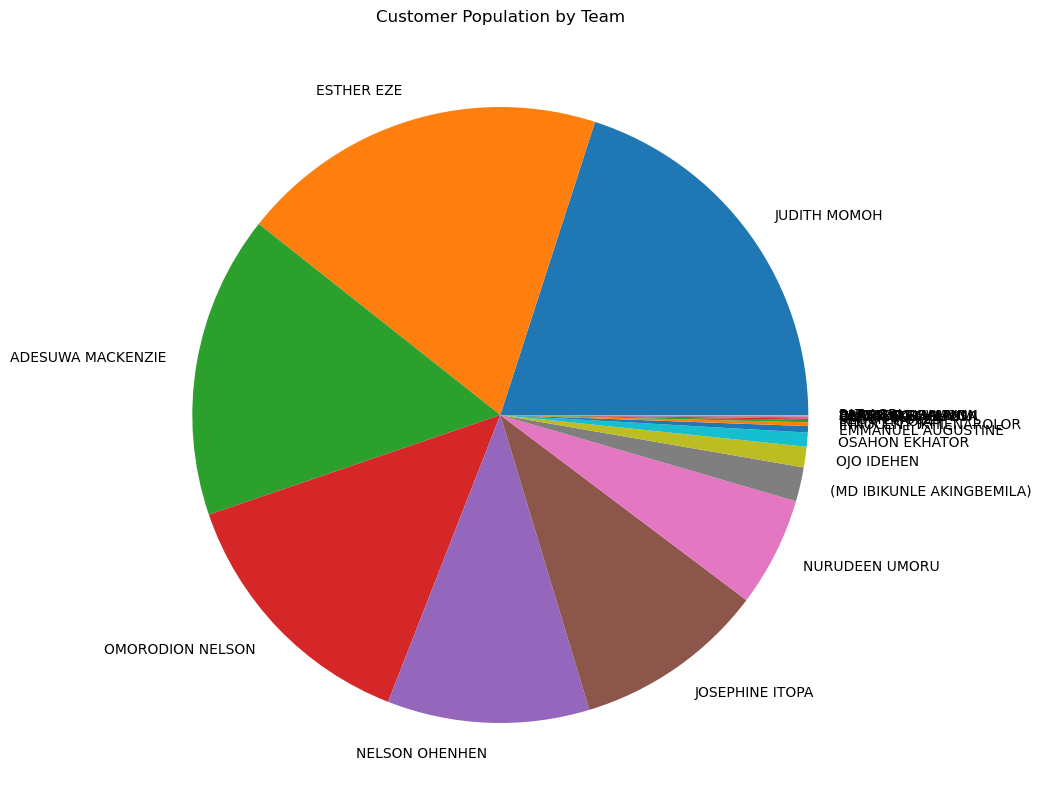

In [111]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Customer Population by Team")
ax.pie(perf_by_team["customer_count"], labels=perf_by_team["team_leader"])
plt.show()
                      

Visualize performance by sales team

<Axes: xlabel='team_leader'>

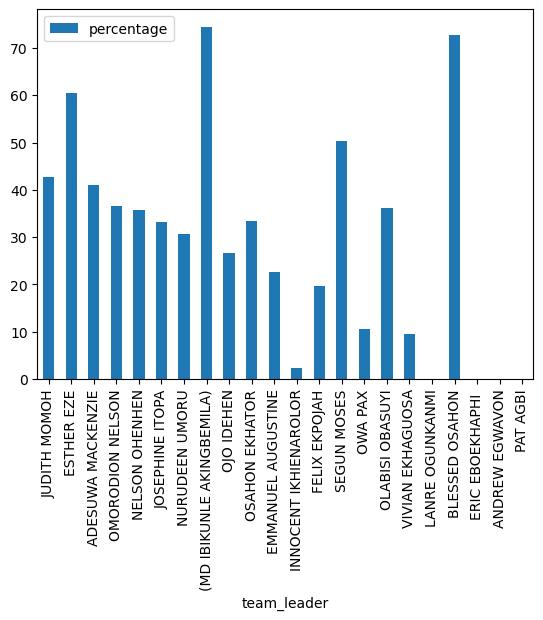

In [88]:
perf_by_team.plot.bar(x = "team_leader", y = "percentage")

In [39]:
perf_by_team.loc[perf_by_team[payment] == 0]

NameError: name 'payment' is not defined

ValueError: Index contains duplicate entries, cannot reshape